In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/credit-risk-classification-dataset/payment_data.csv
/kaggle/input/credit-risk-classification-dataset/customer_data.csv


# Q2

In [ ]:
payment_data = pd.read_csv('/kaggle/input/credit-risk-classification-dataset/payment_data.csv')
df_payment = pd.DataFrame(payment_data)
df_payment.head(5)

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [ ]:
customer_data = pd.read_csv('/kaggle/input/credit-risk-classification-dataset/customer_data.csv')
df_customer = pd.DataFrame(customer_data)
df_customer.head(5)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [ ]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [ ]:
df_custlabel = df_customer[['id','label']]


In [ ]:
df_payriskhist = (df_payment.merge(df_custlabel, left_on='id', right_on='id'))
df_payriskhist

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date,label
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN,0
1,58987402,0,0,0,0,1,0,NaN,04/10/2016,42000.0,35500.0,NaN,0
2,58987402,0,0,0,0,2,10,113300.0,13/02/2016,7938.0,7115.0,24/03/2016,0
3,58987402,0,0,0,0,9,10,NaN,27/07/2015,30039.6,48061.0,04/08/2016,0
4,58987402,0,0,0,0,1,0,NaN,07/12/2011,0.0,150500.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58982397,1,0,0,30,34,10,NaN,13/01/2006,0.0,40863.0,26/04/2009,0
8246,58982397,0,0,0,0,1,10,NaN,20/12/2004,-1.2,1052.0,06/04/2006,0
8247,58982397,0,0,0,0,23,10,205700.0,06/05/2004,0.0,27287.0,12/01/2013,0
8248,58982397,0,0,0,0,3,10,NaN,25/10/2003,0.0,6380.0,20/03/2005,0


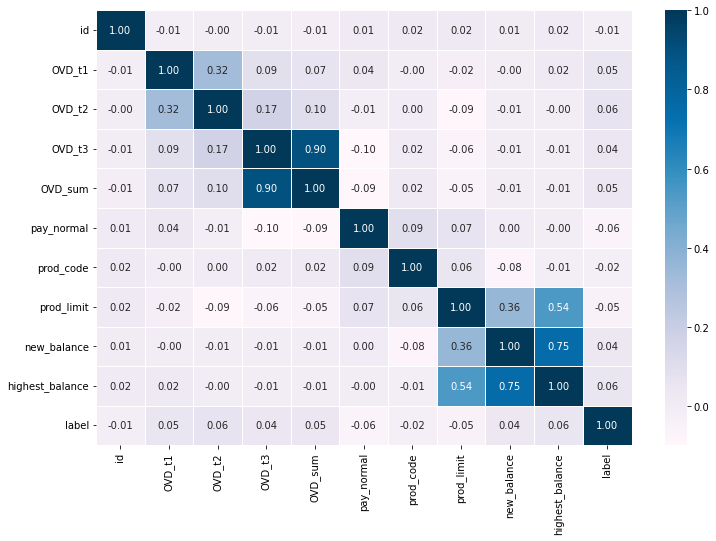

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_payriskhist.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

<a id='11'></a><br>
### I'dont see a factors contributing to Credit Risky customer

# Q2

In [ ]:
df_customer01 = df_customer.dropna()
df_customer01

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
5,0,59005995,6,1217.0,3,56000.0,2,6,-1,100,3,60091,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,0,54985816,7,1320.5,3,108000.0,2,11,5,110,4,510068,248.997992
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


<a id='2'></a><br>
# Detect Outliers Customer Dataset.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df_customer01)

In [ ]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [ ]:
len(outlier_index)

70

In [ ]:
#df_customer01.drop(outlier_index, inplace=True)

In [ ]:
df_customer01.iloc[80:90]

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
93,0,58994510,7,1244.0,3,59000.0,2,11,5,79,3,60040,173.205081
94,1,58985495,5,1314.5,3,177000.0,2,15,5,105,5,60059,1.000000
95,0,58997265,4,1386.5,3,296000.0,2,9,5,109,5,151300,223.606798
97,0,54992046,4,1257.5,1,91000.0,2,8,5,90,3,72000,1.000000
98,0,59000764,4,1269.5,3,107000.0,1,8,9,81,3,60040,173.205081
99,0,58997788,4,1304.0,3,60000.0,2,8,2,95,5,60058,223.606798
100,0,58996671,7,1283.0,3,90000.0,2,11,5,85,5,60000,1.000000
103,1,58989344,7,1265.0,3,70000.0,2,11,-1,81,5,350704,316.227766
104,0,54988214,7,1256.0,1,126000.0,2,11,9,102,3,350705,158.113883
105,0,58990663,7,1314.5,3,150000.0,2,11,10,113,4,60023,187.082869


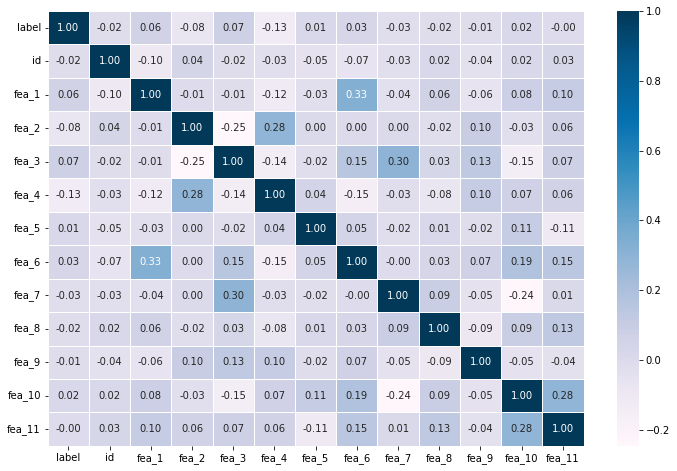

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_customer01.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

<a id='4'></a><br>
# Dealing with Imbalanced Data Customer Dataset

In [ ]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


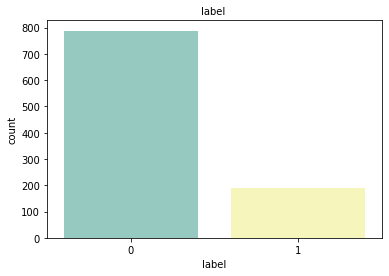

In [ ]:
sns.countplot(df_customer01["label"], palette="Set3")
plt.title("label ",fontsize=10)
plt.show()

In [ ]:
x = df_customer01.drop(['label'], axis = 1)
y = df_customer01.loc[:,'label'].values

In [ ]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 788, 1: 188})
Resampled dataset shape Counter({1: 788, 0: 788})


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


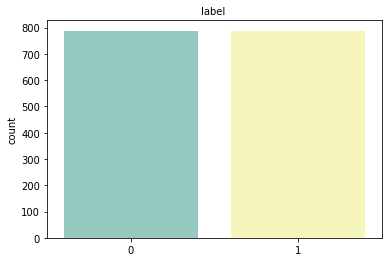

In [ ]:
sns.countplot(y, palette='Set3')
plt.title("label ",fontsize=10)
plt.show()

<a id='5'></a><br>
# Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

<a id='7'></a><br>
# Train / Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

<a id='8'></a><br>
# Classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

In [ ]:
r_forest = RandomForestClassifier(n_estimators = 10000)
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.862


<a id='10'></a><br>
### Confusion Matrix

In [ ]:
classes = ['Low risk','Hight risk']

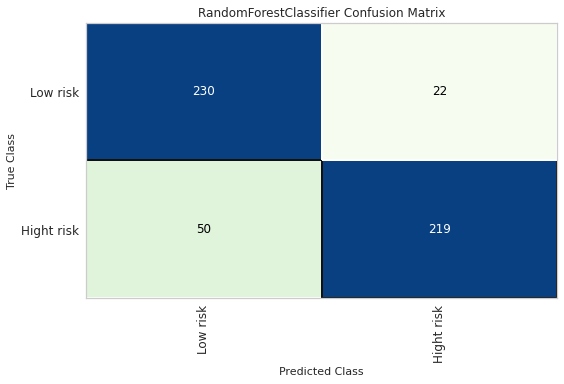

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
r_forest_cm = ConfusionMatrix(r_forest, classes=classes, cmap='GnBu')

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

<a id='11'></a><br>
### Classification Report

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       252
           1       0.91      0.81      0.86       269

    accuracy                           0.86       521
   macro avg       0.87      0.86      0.86       521
weighted avg       0.87      0.86      0.86       521



<a id='12'></a><br>
### ROC Curve

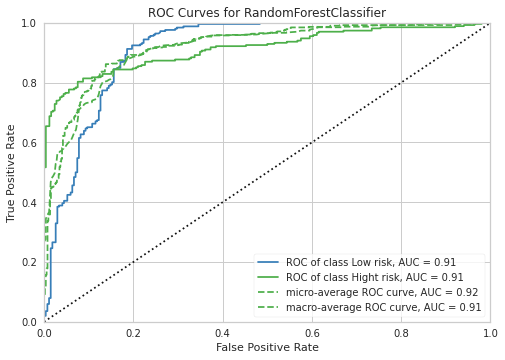

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(r_forest, classes=classes)

set_palette('bold')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

<a id='13'></a><br>
### Class Prediction Error

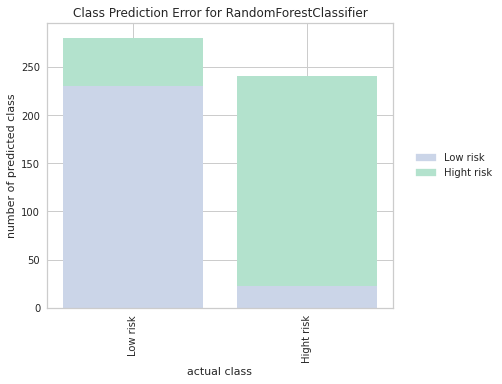

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(r_forest, classes=classes)

set_palette('pastel')

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()